# Load packages and libraries

In [1]:
.libPaths()
.libPaths(new = c("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"))
.libPaths()
# sessionInfo()

Sys.setenv(RETICULATE_PYTHON="/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
library(reticulate)
reticulate::use_python("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/bin/python")
reticulate::use_condaenv("/home/manuel.tardaguila/conda_envs/multiome_QC_DEF")
reticulate::py_module_available(module='leidenalg')
reticulate::import('leidenalg')
suppressMessages(library("optparse"))
suppressMessages(library(hdf5r))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(EnsDb.Hsapiens.v86))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(Matrix))
suppressMessages(library(data.table))
suppressMessages(library(ggpubr))
suppressMessages(library(ggplot2))
suppressMessages(library(scDblFinder))
suppressMessages(library("tidyr"))
suppressMessages(library("tibble"))
suppressMessages(library("biovizBase"))
suppressMessages(library("patchwork"))
suppressMessages(library(glmGamPoi))


[1] "/home/manuel.tardaguila/R/x86_64-conda-linux-gnu-library/4.3"    
[2] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] "/home/manuel.tardaguila/conda_envs/multiome_QC_DEF/lib/R/library"

[1] TRUE

Module(leidenalg)

Warning message:
“package ‘optparse’ was built under R version 4.3.3”
Warning message:
“package ‘Seurat’ was built under R version 4.3.2”
Warning message:
“package ‘Signac’ was built under R version 4.3.2”
Warning message:
“package ‘ensembldb’ was built under R version 4.3.2”
Warning message:
“package ‘BiocGenerics’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicRanges’ was built under R version 4.3.2”
Warning message:
“package ‘S4Vectors’ was built under R version 4.3.2”
Warning message:
“package ‘IRanges’ was built under R version 4.3.2”
Warning message:
“package ‘GenomeInfoDb’ was built under R version 4.3.2”
Warning message:
“package ‘GenomicFeatures’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationDbi’ was built under R version 4.3.2”
Warning message:
“package ‘Biobase’ was built under R version 4.3.2”
Warning message:
“package ‘AnnotationFilter’ was built under R version 4.3.2”
Warning message:
"package 'scDblFinder' was built under R ver

## Read the merged object filtered for doublets and clusterized at high resolution

In [2]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/")

In [3]:
adata<-readRDS(file="merged_unprocessed_db_filt_clustered.rds")

## Check initial metadata

In [4]:
metadata<-adata[[]]

In [5]:
cat("metadata_0\n")
cat(str(metadata))
cat("\n")
cat(str(row.names(metadata)))
cat("\n")


metadata_0
'data.frame':	44611 obs. of  60 variables:
 $ orig.ident                       : chr  "MCO_1278" "MCO_1278" "MCO_1278" "MCO_1278" ...
 $ nCount_RNA                       : num  20131 37354 40293 19368 13148 ...
 $ nFeature_RNA                     : int  5903 7954 7919 5970 4784 7284 5247 5587 5017 4046 ...
 $ percent.mt                       : num  0.457 0.361 0.541 0.423 0.548 ...
 $ nCount_RNA_raw                   : num  20627 37674 40650 19929 13810 ...
 $ nFeature_RNA_raw                 : int  5905 7954 7922 5977 4798 7285 5311 5592 5084 4202 ...
 $ nCount_ATAC                      : num  174530 439892 406774 8286 11580 ...
 $ nFeature_ATAC                    : int  36249 72733 70079 2064 2905 42352 30057 39576 33199 33501 ...
 $ gex_raw_reads                    : int  55696 99956 112159 51478 34690 81252 37384 41995 37238 30687 ...
 $ gex_mapped_reads                 : int  53947 96927 108799 49918 33634 78679 36228 40773 36065 29591 ...
 $ gex_conf_intergenic_reads  

# Graphs of clusterization

In [9]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/",'graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

## Graph WNN by SampleID

png 
  2

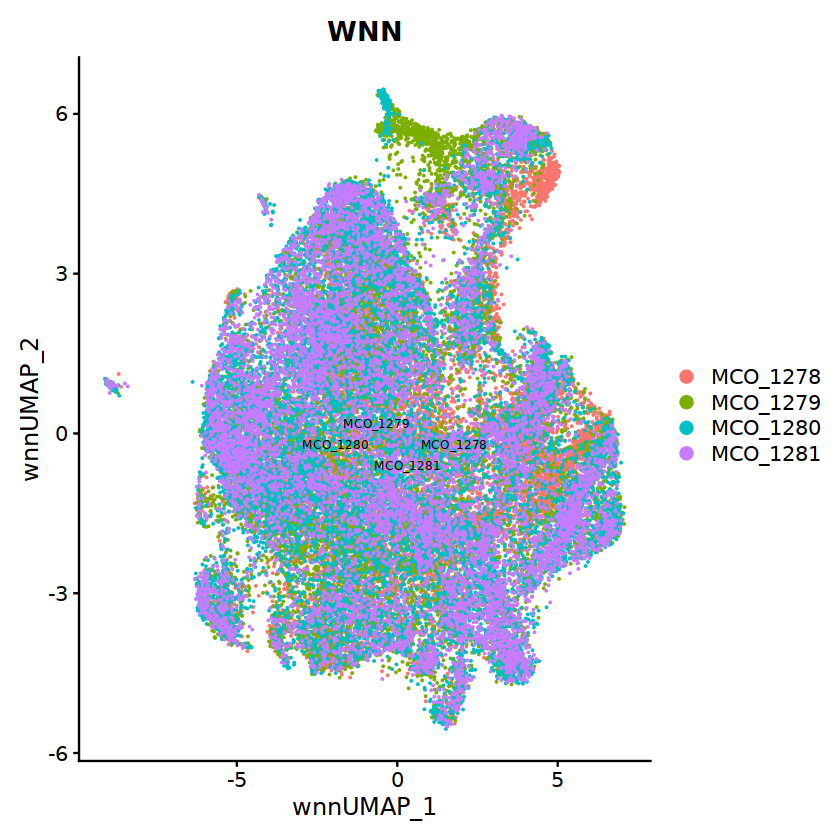

In [10]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "orig.ident", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_SampleID.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN by Seurat cluster

png 
  2

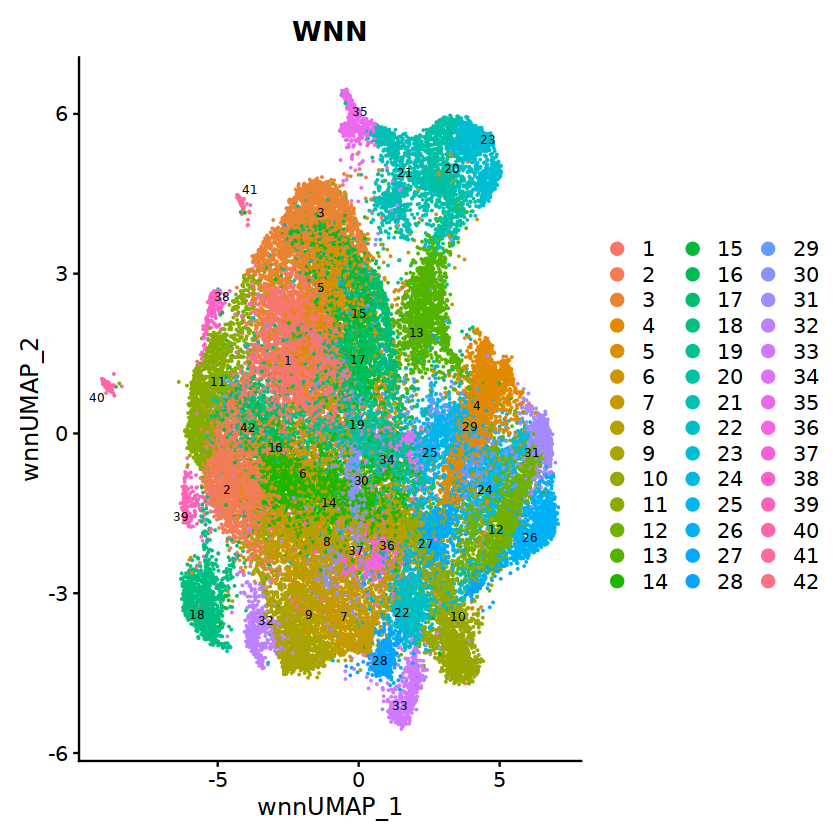

In [11]:
p3 <- DimPlot(adata, reduction = "umap.wnn", group.by = "seurat_clusters", label = TRUE, label.size = 2.5, repel = TRUE) + ggtitle("WNN")
p3  & theme(plot.title = element_text(hjust = 0.5))

setwd(path_graphs)
png(file='WNN_by_Seurat_cluster.png', width =500, height = 350)
p3  & theme(plot.title = element_text(hjust = 0.5))
dev.off()

## Graph WNN_Intermediate_QC_metrics

png 
  2

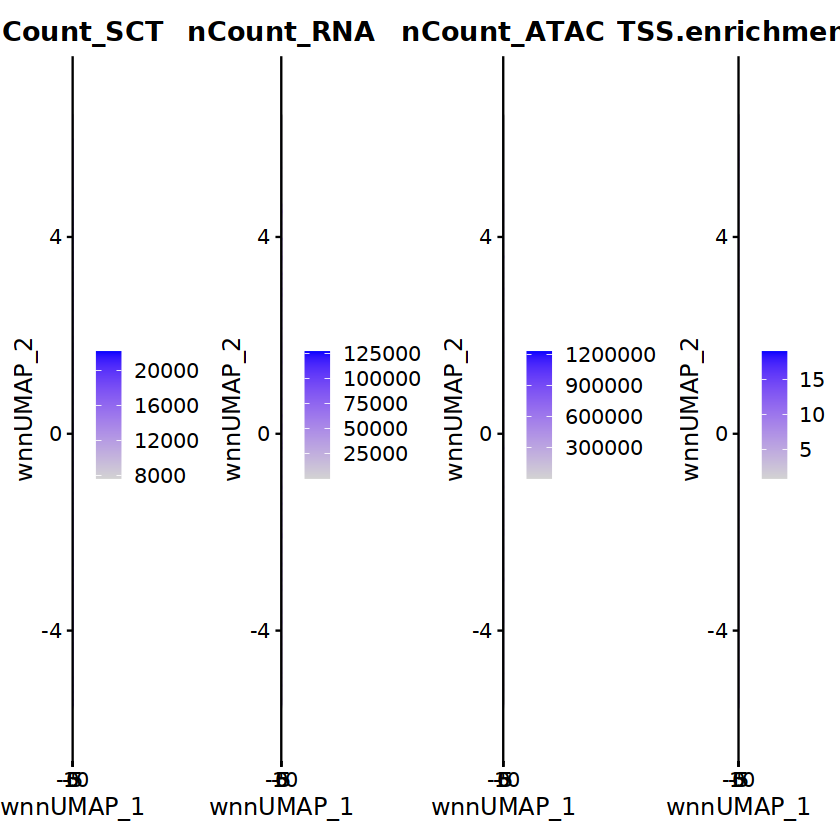

In [12]:
p6 <- FeaturePlot(adata, features = c("nCount_SCT", "nCount_RNA", "nCount_ATAC",'TSS.enrichment'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics.png', width =1000, height = 500)
p6
dev.off()

png 
  2

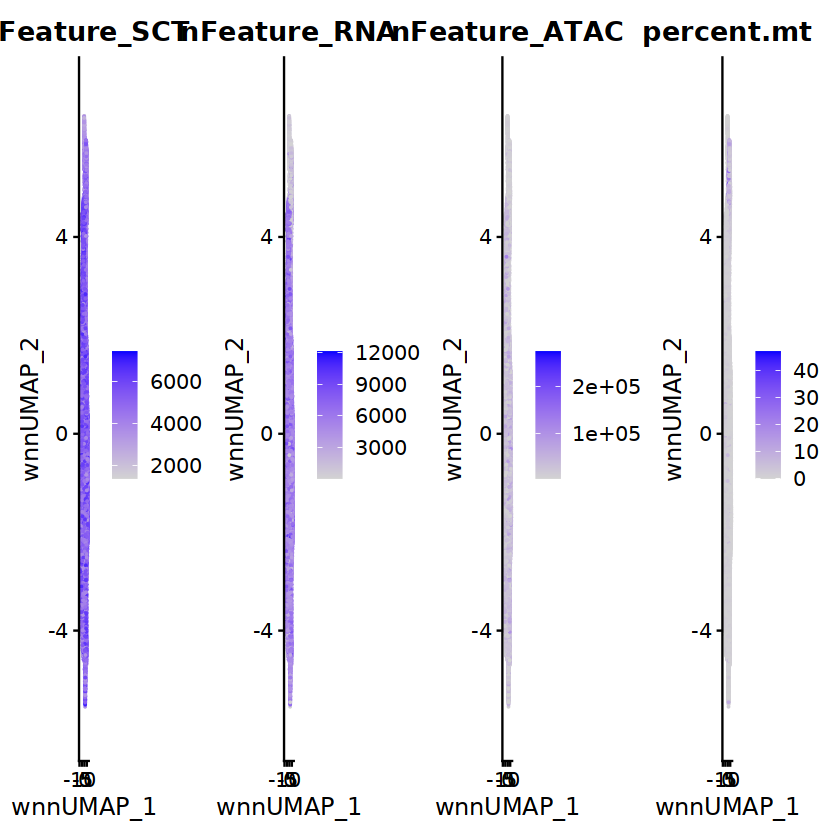

In [13]:
p6 <- FeaturePlot(adata, features = c("nFeature_SCT", "nFeature_RNA", "nFeature_ATAC",'percent.mt'), ncol = 4,
                  reduction = 'umap.wnn')

p6

setwd(path_graphs)
png(file='WNN_Intermediate_QC_metrics_2.png', width =1000, height = 500)
p6
dev.off()

## Graph WNN by marker genes

In [14]:
DefaultAssay(adata) <- 'SCT'

genes<-Features(adata)

str(genes)

 chr [1:31132] "MIR1302-2HG" "OR4F5" "AL627309.1" "AL627309.3" "AL627309.2" ...


In [15]:
genes[grep("GZM", genes)]

[1] "GZMA" "GZMH" "GZMB" "GZMM"

In [16]:
genes[grep("IFNG", genes)]

[1] "IFNGR1"   "IFNG-AS1" "IFNG"     "IFNGR2"

png 
  2

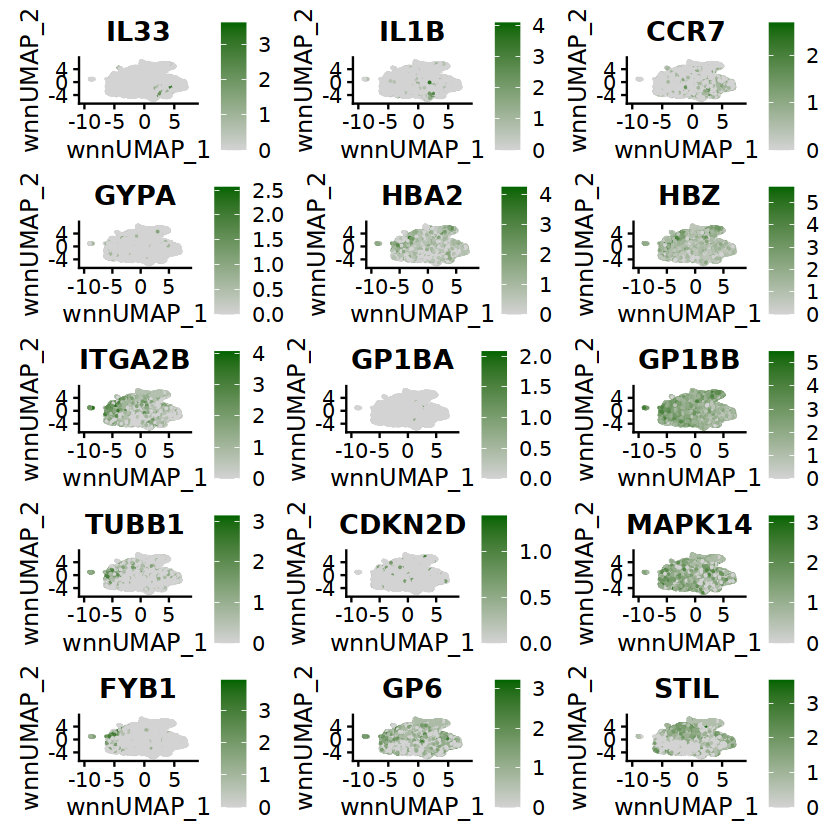

In [18]:
## Graph 

DefaultAssay(adata) <- 'SCT'


p5 <- FeaturePlot(adata, features = c('IL33','IL1B','CCR7'),
                  reduction = 'umap.wnn', 
                  cols = c("lightgrey","darkgreen"), ncol = 3)


p5_1 <- FeaturePlot(adata, features = c('GYPA','HBA2','HBZ'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p5_3 <- FeaturePlot(adata, features = c('ITGA2B','GP1BA', 'GP1BB'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_7 <- FeaturePlot(adata, features = c('FYB1','GP6','STIL'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)

p_6 <- FeaturePlot(adata, features = c('TUBB1','CDKN2D','MAPK14'),
                    reduction = 'umap.wnn', 
                    cols = c("lightgrey","darkgreen"), ncol = 3)


p5 / p5_1 / p5_3 / p_6 / p_7

setwd(path_graphs)
png(file='UMAP_marker_genes.png', width =1000, height = 1500)
p5 / p5_1 / p5_3 / p_6 / p_7
dev.off()

# Violin graphs to decide if a cluster is lowQuality

## Percent.mt

png 
  2

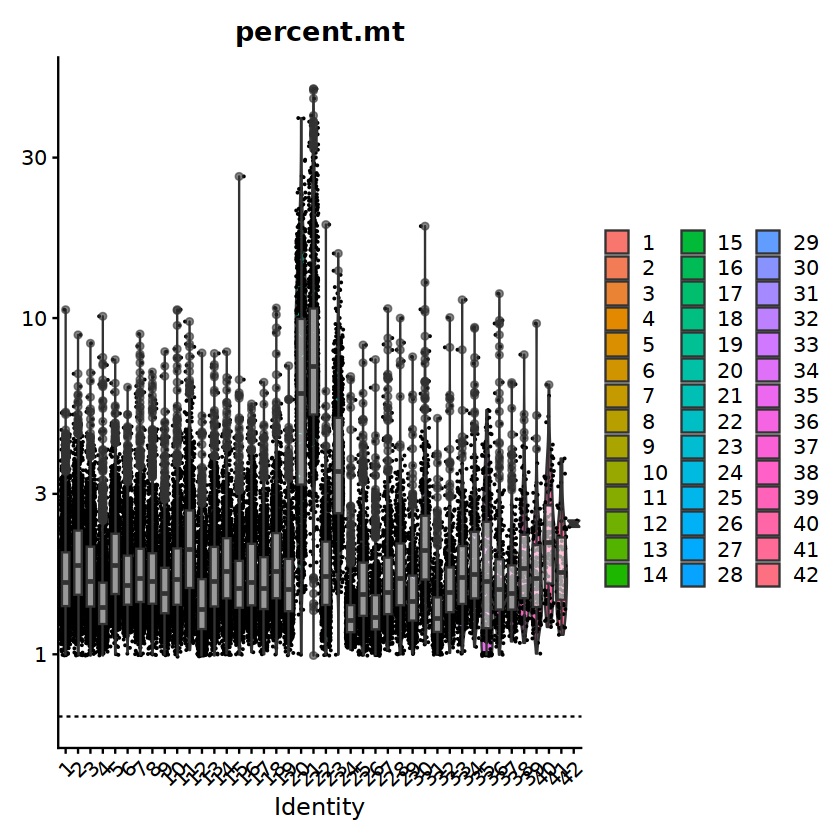

In [19]:
p10 <- VlnPlot(adata, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

In [20]:
p10 <- VlnPlot(adata, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_SCT

In [21]:
p10 <- VlnPlot(adata, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_ATAC

In [22]:
p10 <- VlnPlot(adata, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC.png', width =2000, height = 500)
p10
dev.off()



png 
  2

## nFeature_ATAC

In [23]:
####

p10 <- VlnPlot(adata, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_RNA

In [24]:
####

p10 <- VlnPlot(adata, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_RNA

In [25]:
####

p10 <- VlnPlot(adata, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## TSS.enrichment

In [26]:
####

p10 <- VlnPlot(adata, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## amulet_nFrags

In [27]:
####

p10 <- VlnPlot(adata, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## scDblFinder.score

In [28]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## scDblFinder.score_atac

In [29]:
####

p10 <- VlnPlot(adata, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac.png', width =2000, height = 500)
p10
dev.off()

png 
  2

# QC decisions

In [6]:
adata

An object of class Seurat 
664468 features across 44611 samples within 4 assays 
Active assay: ATAC (560134 features, 560134 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

## Remove high mito content cells (more or equal to 10% mt genes ------------------


In [7]:
###### Remove high mito content cells (more or equal to 10% mt genes ------------------
  
adata = subset(adata, subset = percent.mt < 10)

In [8]:
adata

An object of class Seurat 
664468 features across 44152 samples within 4 assays 
Active assay: ATAC (560134 features, 560134 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

## DECISION TO FILTER OUT CLUSTERS 20 and 21 based pc.mt

In [9]:
adata3 = subset(adata, seurat_clusters!= 20)


adata3

An object of class Seurat 
664468 features across 43319 samples within 4 assays 
Active assay: ATAC (560134 features, 560134 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

In [10]:
rm(adata)

In [11]:
adata3 = subset(adata3, seurat_clusters!= 21)


adata3

An object of class Seurat 
664468 features across 42563 samples within 4 assays 
Active assay: ATAC (560134 features, 560134 variable features)
 2 layers present: counts, data
 3 other assays present: RNA, RNA_raw, SCT
 5 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap.wnn

# Save QC'ed object 

In [12]:
setwd("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/")

In [13]:
saveRDS(adata3, file="merged_unprocessed_db_filt_clustered_QCed.rds")

# Post QC Violin graphs to decide if a cluster is lowQuality

In [14]:
 path_graphs = paste("/group/soranzo/manuel.tardaguila/2025_K562_multiome_reanalysis/processing_outputs/",'graphs','/',sep='')
  
  if (file.exists(path_graphs)){
    
    
  }else{
    
    dir.create(file.path(path_graphs))
    
  }#path_processing_outputs

NULL

## Percent.mt

png 
  2

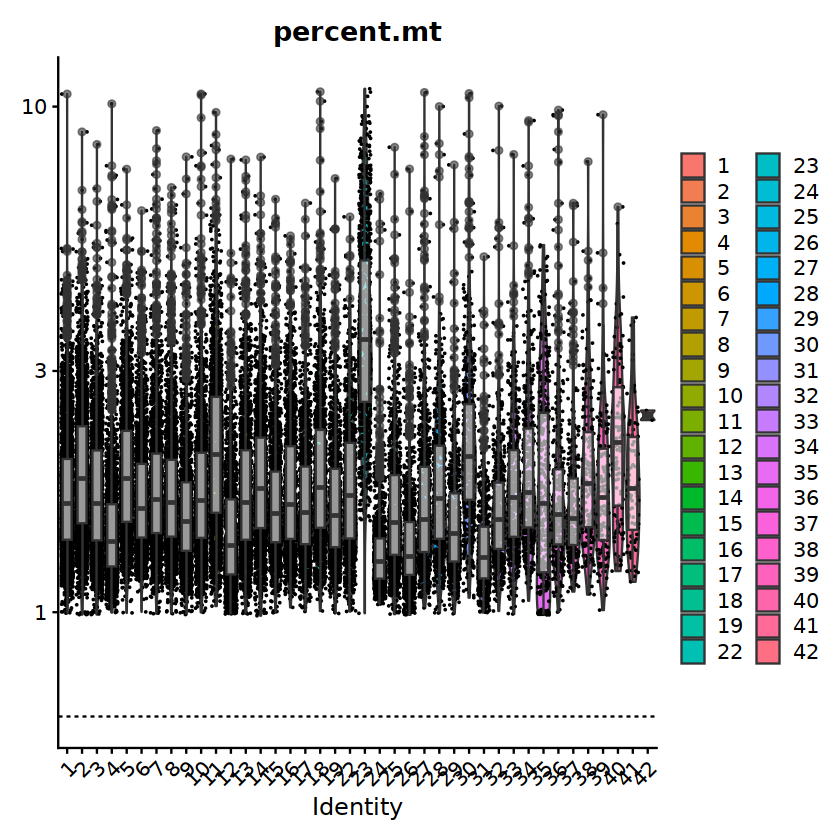

In [15]:
p10 <- VlnPlot(adata3, features='percent.mt', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$percent.mt), linetype='dashed')


p10
setwd(path_graphs)
png(file='Vln_percent_POST.mt.png', width =2000, height = 500)
p10
dev.off()

## nCount_SCT

In [16]:
p10 <- VlnPlot(adata3, features='nCount_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_SCT_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_SCT

In [17]:
p10 <- VlnPlot(adata3, features='nFeature_SCT', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_SCT), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_SCT_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_ATAC

In [18]:
p10 <- VlnPlot(adata3, features='nCount_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_ATAC), linetype='dashed')


setwd(path_graphs)
png(file='Vln_nCount_ATAC_POST.png', width =2000, height = 500)
p10
dev.off()



png 
  2

## nFeature_ATAC

In [19]:
####

p10 <- VlnPlot(adata3, features='nFeature_ATAC', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_RNA), linetype='dashed')

setwd(path_graphs)
png(file='Vln_nFeature_ATAC_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nCount_RNA

In [20]:
####

p10 <- VlnPlot(adata3, features='nCount_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nCount_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nCount_RNA_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## nFeature_RNA

In [21]:
####

p10 <- VlnPlot(adata3, features='nFeature_RNA', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$nFeature_RNA), linetype='dashed')



setwd(path_graphs)
png(file='Vln_nFeature_RNA_POST.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## TSS.enrichment

In [22]:
####

p10 <- VlnPlot(adata3, features='TSS.enrichment', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$TSS.enrichment), linetype='dashed')



setwd(path_graphs)
png(file='Vln_TSS.enrichment_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## amulet_nFrags

In [23]:
####

p10 <- VlnPlot(adata3, features='amulet_nFrags', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$amulet_nFrags), linetype='dashed')



setwd(path_graphs)
png(file='Vln_amulet_nFrags_POST.png', width =2000, height = 500)
p10
dev.off()


png 
  2

## scDblFinder.score

In [24]:
####

p10 <- VlnPlot(adata3, features='scDblFinder.score', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$scDblFinder.score), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2

## scDblFinder.score_atac

In [25]:
####

p10 <- VlnPlot(adata3, features='scDblFinder.score_atac', group.by='seurat_clusters', log=TRUE) + geom_boxplot(width=.6, fill='white', alpha=.6) + geom_hline(yintercept=median(adata3$scDblFinder.score_atac), linetype='dashed')



setwd(path_graphs)
png(file='Vln_scDblFinder.score_atac_POST.png', width =2000, height = 500)
p10
dev.off()

png 
  2